In [21]:
import torch
from torch import nn
import matplotlib.pyplot as plt

Creating / Loading Data into tensors

In [52]:
start, end, step = 0, 50, 0.01
x = torch.arange(start, end, step)
X = x.unsqueeze(dim=1)

In [74]:
torch.manual_seed(0)
weight, bias = 0.7, 0.3

In [76]:
err = torch.rand_like(X)
y = weight * X + bias + err

In [78]:
split_ratio = 0.8
size = int(split_ratio * len(X))
X_train, y_train = X[:size], y[:size]
X_test, y_test = X[size:], y[size:]

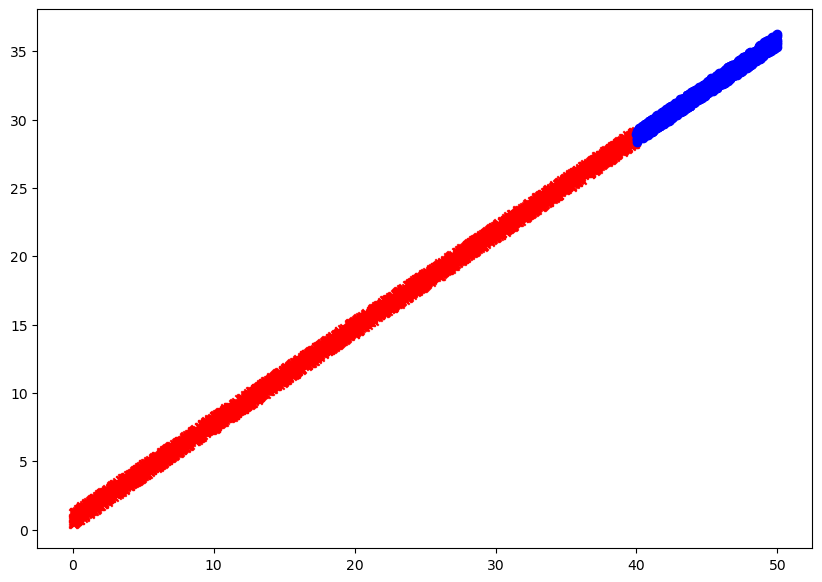

In [79]:
plt.figure(figsize=(10, 7))
plt.scatter(x = X_train, y = y_train, c = 'r', marker ='x')
plt.scatter(x = X_test, y = y_test, c = 'b', marker = 'o')
plt.show()

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # set up the Parameters here
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
    
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return x @ self.weights + self.bias

Important Torch modules:
1. ```torch.nn``` : essential in building the computational graph
2. ```torch.optim```: Optimization algorithms
3. ```torch.utils.data.Dataset```: 
4. ```torch.utils.data.DataLoader```: 
5. ```torch.nn.Module```: base class for all neural networks and require ```forward()``` method to be implemented
6. ```torch.nn.Parameter```: Tensor object which stores the parameters of the model

In [116]:
torch.manual_seed(0)

In [132]:
linreg = LinearRegression()
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params=linreg.parameters(), lr = 0.01)

In [133]:
no_epochs = 100
epoch_vals, train_errs, test_errs = [], [], []

In [134]:
# training loop
for epoch in range(no_epochs):
    linreg.train()
    y_pred = linreg(X_train)
    loss = loss_fn(y_pred, y_train.type(torch.float).squeeze())
    optim.zero_grad()
    loss.backward()
    optim.step()

    linreg.eval()
    with torch.inference_mode():
        y_pred = linreg(X_test)
        test_loss = loss_fn(y_pred, y_test.type(torch.float).squeeze())

        if epoch % 5 == 0:
            print(f"Epoch no: {epoch}   Training_loss: {loss}   Testing_loss: {test_loss}")
            epoch_vals.append(epoch)
            train_errs.append(loss.detach().numpy())
            test_errs.append(test_loss.detach().numpy())

Epoch no: 0   Training_loss: 5.9069342613220215   Testing_loss: 4.306704044342041
Epoch no: 5   Training_loss: 1.941940426826477   Testing_loss: 4.56682825088501
Epoch no: 10   Training_loss: 2.033214569091797   Testing_loss: 4.45896577835083
Epoch no: 15   Training_loss: 2.000757932662964   Testing_loss: 4.439144611358643
Epoch no: 20   Training_loss: 1.981276512145996   Testing_loss: 4.574776649475098
Epoch no: 25   Training_loss: 2.0483932495117188   Testing_loss: 4.335236549377441
Epoch no: 30   Training_loss: 1.9374221563339233   Testing_loss: 4.671761989593506
Epoch no: 35   Training_loss: 2.0896832942962646   Testing_loss: 4.244539737701416
Epoch no: 40   Training_loss: 1.8995283842086792   Testing_loss: 4.756004333496094
Epoch no: 45   Training_loss: 2.1245362758636475   Testing_loss: 4.168091773986816
Epoch no: 50   Training_loss: 1.8674999475479126   Testing_loss: 4.826264381408691
Epoch no: 55   Training_loss: 2.1539480686187744   Testing_loss: 4.1034979820251465
Epoch no: 6

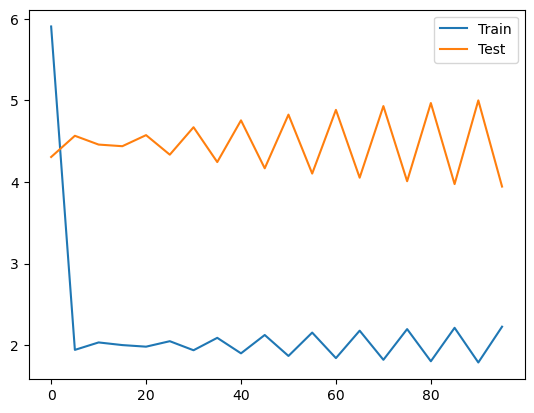

In [135]:
plt.plot(epoch_vals, train_errs, label = "Train")
plt.plot(epoch_vals, test_errs, label = 'Test')
plt.legend()
plt.show()

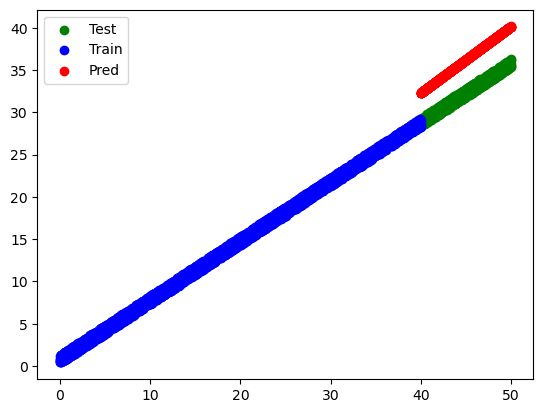

In [136]:
linreg.eval()
with torch.inference_mode():
    y_pred = linreg(X_test)

plt.scatter(X_test, y_test, c = 'g', label = 'Test')
plt.scatter(X_train, y_train, c = 'b', label = 'Train')
plt.scatter(X_test, y_pred, c = 'r', label = 'Pred')
plt.legend()
plt.show()

In [137]:
linreg.state_dict()

OrderedDict([('weights', tensor([0.7862])), ('bias', tensor([0.8505]))])

In [138]:
from pathlib import Path

In [139]:
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [140]:
MODEL_NAME = "lin_req.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [141]:
torch.save(obj=linreg.state_dict(), f = MODEL_SAVE_PATH)

In [142]:
linreg1 = LinearRegression()
linreg1.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [143]:
torch.manual_seed(45)

In [153]:
start, end, step = 0, 100, 1
X = torch.arange(start = start, end = end, step = step).unsqueeze(dim=1)

In [154]:
X.shape

torch.Size([100, 1])

In [155]:
weight, bias = 0.3, 0.9
y = weight * X + bias

In [156]:
split_ratio = 0.8
size = int(0.8 * len(y))
# stratify this
X_train, y_train = X[:size], y[:size]
X_test, y_test   = X[size:], y[size:]

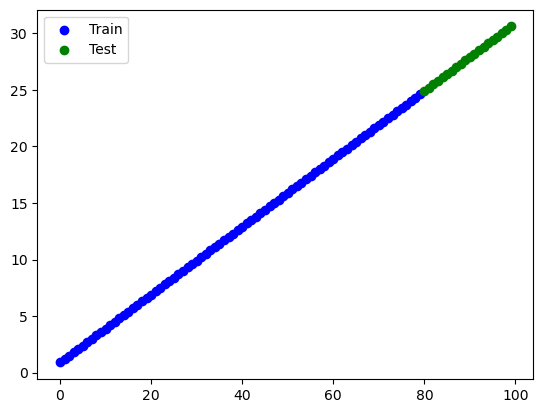

In [157]:
plt.scatter(X_train, y_train, c = 'b', label = "Train")
plt.scatter(X_test, y_test, c = 'g', label = "Test")
plt.legend()
plt.show()

In [158]:
class LinearRegression(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        # Parameters
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [185]:
class ModelTraining:
    def __init__(self, model, loss_fn, train, test) -> None:
        self.model = model
        self.loss_fn  = loss_fn
        self.X_train, self.y_train = train
        self.X_test, self.y_test = test
    
    def train(self, no_epochs, optim):
        self.optim = optim
        training_sum = dict()

        for epoch in range(no_epochs):
            self.model.train()
            tr_loss = self.loss_fn(self.model(self.X_train), self.y_train.type(torch.float).squeeze())
            self.optim.zero_grad()
            tr_loss.backward()
            self.optim.step()

            if epoch % 20 == 0:
                self.model.eval()

                with torch.inference_mode():
                    y_pred = self.model(self.X_test)
                    ts_loss = self.loss_fn(y_pred, self.y_test.type(torch.float).squeeze())
                    print(f"Epoch no: {epoch}   Training Loss: {tr_loss}, Test Loss: {ts_loss}")
                    training_sum[epoch] = {"Training Loss": tr_loss.detach().numpy(), "Test Loss": ts_loss.detach().numpy()}
        return self.model, training_sum
    
    def pred(self, x : torch.Tensor):
        self.model.eval()
        with torch.inference_mode():
            pred = self.model(x)
        return pred

In [186]:
lr = LinearRegression()
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(lr.parameters(), lr=0.01)

In [187]:
lr.state_dict()

OrderedDict([('weights', tensor([-0.9959])), ('bias', tensor([0.2501]))])

In [188]:
mt = ModelTraining(lr, loss_fn, (X_train, y_train), (X_test, y_test))

In [189]:
model, sum_tr = mt.train(300, optim)

/home/pranav-rao/anaconda3/lib/python3.13/site-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/home/pranav-rao/anaconda3/lib/python3.13/site-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch no: 0   Training Loss: 51.83894348144531, Test Loss: 81.27273559570312
Epoch no: 20   Training Loss: 7.637856483459473, Test Loss: 6.443698883056641
Epoch no: 40   Training Loss: 7.624067306518555, Test Loss: 6.455540657043457
Epoch no: 60   Training Loss: 7.610377311706543, Test Loss: 6.503361225128174
Epoch no: 80   Training Loss: 7.596801280975342, Test Loss: 6.550283908843994
Epoch no: 100   Training Loss: 7.5833516120910645, Test Loss: 6.562166690826416
Epoch no: 120   Training Loss: 7.569972515106201, Test Loss: 6.618160247802734
Epoch no: 140   Training Loss: 7.556707382202148, Test Loss: 6.666235446929932
Epoch no: 160   Training Loss: 7.543552398681641, Test Loss: 6.682915687561035
Epoch no: 180   Training Loss: 7.530496597290039, Test Loss: 6.728606700897217
Epoch no: 200   Training Loss: 7.5175461769104, Test Loss: 6.770305156707764
Epoch no: 220   Training Loss: 7.504715442657471, Test Loss: 6.746667385101318
Epoch no: 240   Training Loss: 7.491971969604492, Test Loss

In [190]:
pred = mt.pred(X_test)

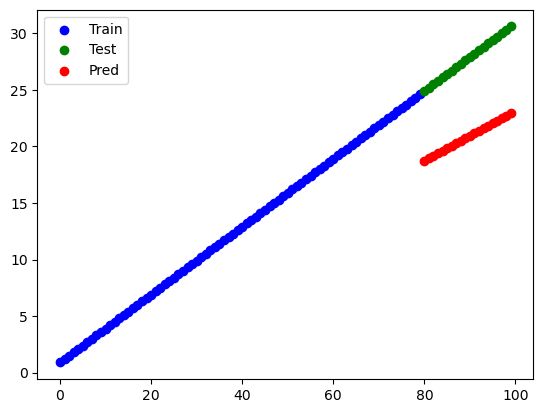

In [191]:
plt.scatter(X_train, y_train, c = 'b', label = "Train")
plt.scatter(X_test, y_test, c = 'g', label = "Test")
plt.scatter(X_test, pred, c = 'r', label = "Pred")
plt.legend()
plt.show()

In [192]:
MODEL_NAME = 'lin_reg1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=lr.state_dict, f = MODEL_SAVE_PATH)